In [1]:
# Import all necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random

%matplotlib inline

In [2]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(1234)

In [3]:
# Number of pairs feature/label.
N = 10000

In [4]:
# Input values (features)
x1 = np.random.randn(N, 1)

x2 = 10.0*np.random.randn(N, 1) + 10.0

# Output values (targets).
y = x1 + x2

# Noisy version.
y_noisy = y + np.random.randn(N, 1)

# Concatenate both column vectors.
X = np.c_[x1, x2]

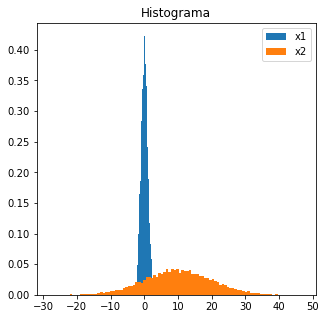

In [5]:
plt.figure(figsize=(5,5))
plt.hist(x1, bins=100, density=True, label='x1')
plt.hist(x2, bins=100, density=True, label='x2')
plt.legend()
plt.title('Histograma')
plt.savefig('histogram_not_scaled.png', dpi=600)
plt.show()

In [6]:
def batchGradientDescent(X, y, alpha=0.4, n_iterations=1000, precision=0.00001):
    """Batch gradient descent solution."""
    
    # Number of examples.
    N = len(y)
    
    # Random initialization of parameters.
    a = np.array([-10.0, -10.0]).reshape(2, 1)

    # Create vector for parameter history.
    a_hist = np.zeros((2, n_iterations+1))
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(2,)

    # Create array for storing error values.
    Jgd = np.zeros(n_iterations+1)

    Jgd[0] = (1.0/N)*sum(np.power(y - X.dot(a), 2))

    # Batch gradient-descent loop.
    iteration = 0
    error = 1
    grad_hist = np.zeros((2, n_iterations))
    while iteration < n_iterations and error > precision:
        gradients = -(2.0/N)*X.T.dot(y - X.dot(a))
        a = a - alpha*gradients
        
        Jgd[iteration+1] = (1.0/N)*sum(np.power((y - X.dot(a)), 2))
        grad_hist[:, iteration] = gradients.reshape(2,)
        a_hist[:, iteration+1] = a.reshape(2,)
        
        error = np.abs(Jgd[iteration+1] - Jgd[iteration])
        
        iteration = iteration + 1
    return a, Jgd, a_hist, grad_hist, iteration

# Sem escalonamento dos atributos

In [7]:
# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))

In [8]:
# Generate values for parameter space.
M = 200
a1 = np.linspace(-12.0, 14.0, M)
a2 = np.linspace(-12.0, 14.0, M)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface without feature scaling.
J = np.zeros((M,M))
for iter1 in range(0, M):
    for iter2 in range(0, M):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2    
        J[iter1][iter2] = (1.0/N)*np.sum(np.square(y_noisy - yhat))

In [9]:
# learning rate.
alpha = 0.001

# Maximum number of iterations.
n_iterations = 10000

a, Jgd, a_hist, grad_hist, iteration = batchGradientDescent(X, y_noisy, alpha, n_iterations)

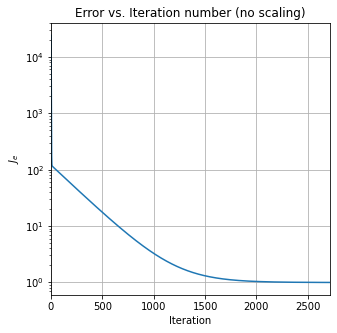

In [10]:
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number (no scaling)')
plt.grid()
plt.savefig('error_vs_iteration_not_scaled.png', dpi=600)
plt.show()

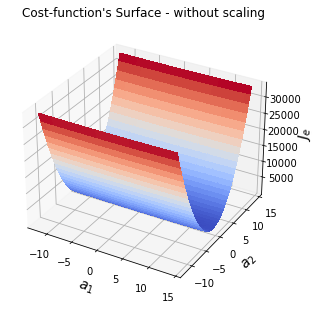

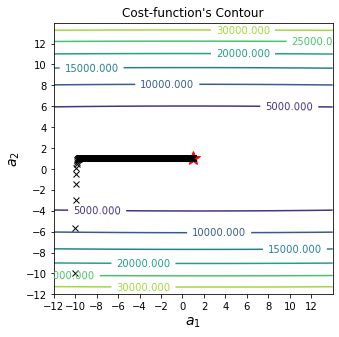

In [11]:
# Plot cost-function surface.
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14)
plt.title('Cost-function\'s Surface - without scaling')
plt.savefig('surface_not_scaled.png', dpi=600)
#Show the plot.
plt.show()

fig = plt.figure(figsize=(5, 5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=14)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
plt.savefig('contorn_not_scaled.png', dpi=600)
#Show the plot.
plt.show()

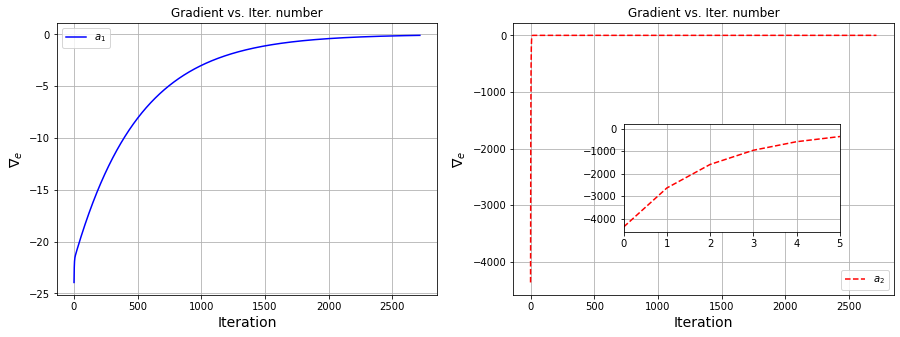

In [12]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.plot(np.arange(0, iteration), grad_hist[0,0:iteration], 'b', label='$a_1$')
ax1.set_xlabel('Iteration', fontsize=14)
ax1.set_ylabel('$\\nabla_e$', fontsize=14)
ax1.set_title('Gradient vs. Iter. number')
ax1.legend()
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.plot(np.arange(0, iteration), grad_hist[1,0:iteration], 'r--', label='$a_2$')
ax2.set_xlabel('Iteration', fontsize=14)
ax2.set_ylabel('$\\nabla_e$', fontsize=14)
ax2.set_title('Gradient vs. Iter. number')
ax2.legend()
ax2.grid()

left, bottom, width, height = [0.65, 0.3, 0.2, 0.3]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.plot(np.arange(0, iteration), grad_hist[1,0:iteration], 'r--')
ax3.set_xlim(0, 5)
ax3.grid()

plt.savefig('gradient_not_scaled.png', dpi=600)

plt.show()

# Padronizando os atributos

In [29]:
# Import Class StandardScaler from module Preprocessing of 
# library sklearn responsible for standardizing the data.
from sklearn.preprocessing import StandardScaler

# Instantiate a Standard scaler.
stdScaler = StandardScaler()

# Standardize the features.
scaled_X = stdScaler.fit_transform(X)

scaled_x1 = scaled_X[:,0].reshape(N,1)
scaled_x2 = scaled_X[:,1].reshape(N,1)

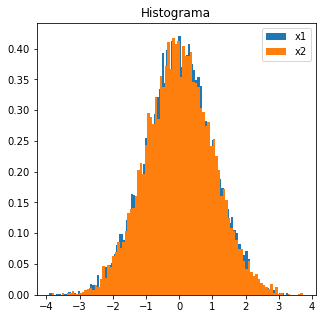

In [30]:
plt.figure(figsize=(5,5))
plt.hist(scaled_x1, bins=100, density=True, label='x1')
plt.hist(scaled_x2, bins=100, density=True, label='x2')
plt.legend()
plt.title('Histograma')
plt.savefig('histogram_standardized.png', dpi=600)
plt.show()

In [15]:
# Closed-form solution.
a_opt_pad = np.linalg.pinv(np.transpose(scaled_X).dot(scaled_X)).dot(np.transpose(scaled_X).dot(y_noisy))

In [16]:
# Generate values for parameter space.
M = 200
a1 = np.linspace(-20.0, 22.0, M)
a2 = np.linspace(-10.0, 32.0, M)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface with feature scaling.
J = np.zeros((M,M))
for iter1 in range(0, M):
    for iter2 in range(0, M):
        yhat = A1[iter1][iter2]*scaled_x1 + A2[iter1][iter2]*scaled_x2
        J[iter1][iter2] = (1.0/N)*np.sum(np.square(y_noisy - yhat))

In [17]:
# learning rate.
alpha = 0.3

# Maximum number of iterations.
n_iterations = 10000

a, Jgd, a_hist, grad_hist, iteration = batchGradientDescent(scaled_X, y_noisy, alpha, n_iterations)

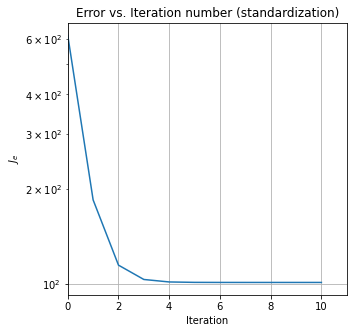

In [18]:
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number (standardization)')
plt.grid()
plt.savefig('error_vs_iteration_standardized.png', dpi=600)
plt.show()

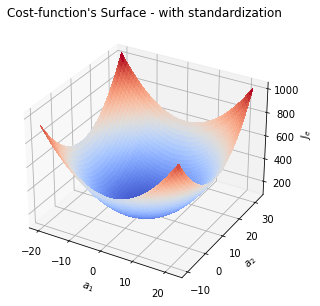

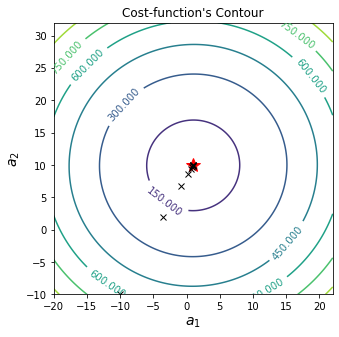

In [19]:
# Plot cost-function surface.
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.set_zlabel('$J_e$')
plt.title('Cost-function\'s Surface - with standardization')
plt.savefig('surface_standardized.png', dpi=600)
#Show the plot.
plt.show()

fig = plt.figure(figsize=(5, 5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.plot(a_opt_pad[0], a_opt_pad[1], c='r', marker='*', markersize=14)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.savefig('contorn_standardized.png', dpi=600)
#Show the plot.
plt.show()

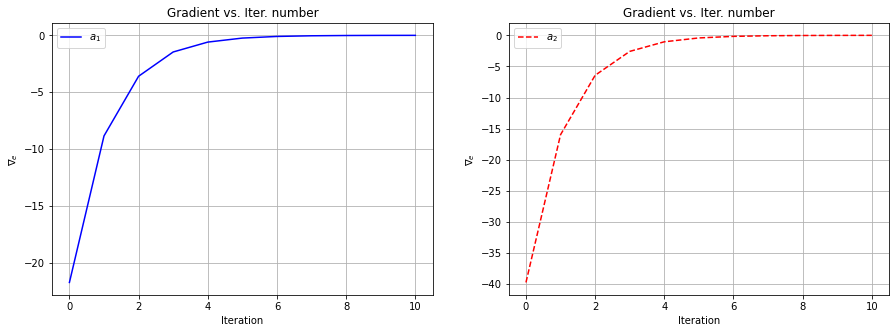

In [20]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.plot(np.arange(0, iteration), grad_hist[0,0:iteration], 'b', label='$a_1$')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('$\\nabla_e$')
ax1.set_title('Gradient vs. Iter. number')
ax1.legend()
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.plot(np.arange(0, iteration), grad_hist[1,0:iteration], 'r--', label='$a_2$')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('$\\nabla_e$')
ax2.set_title('Gradient vs. Iter. number')
ax2.legend()
ax2.grid()

plt.savefig('gradiente_standardized.png', dpi=600)

plt.show()

# Normalizando os atributos

In [21]:
# Import Class MinMaxScaler from module Preprocessing of library sklearn responsible for normalizing the data.
from sklearn.preprocessing import MinMaxScaler

# Instantiate a MinMax scaler.
minMaxScaler = MinMaxScaler()

# Standardize the features.
scaled_X = minMaxScaler.fit_transform(X)

scaled_x1 = scaled_X[:,0].reshape(N,1)
scaled_x2 = scaled_X[:,1].reshape(N,1)

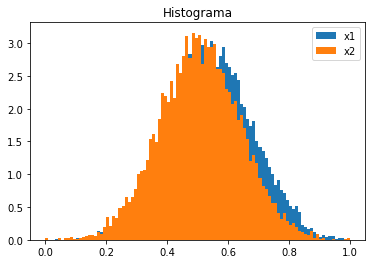

In [22]:
plt.hist(scaled_x1, bins=100, density=True, label='x1')
plt.hist(scaled_x2, bins=100, density=True, label='x2')
plt.legend()
plt.title('Histograma')
plt.savefig('histogram_normalized.png', dpi=600)
plt.show()

In [23]:
# Closed-form solution.
a_opt_norm = np.linalg.pinv(np.transpose(scaled_X).dot(scaled_X)).dot(np.transpose(scaled_X).dot(y_noisy))

In [24]:
# Generate values for parameter space.
M = 200
a1 = np.linspace(-60.0, 22.0, M)
a2 = np.linspace(-20.0, 82.0, M)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface with feature scaling.
J = np.zeros((M,M))
for iter1 in range(0, M):
    for iter2 in range(0, M):
        yhat = A1[iter1][iter2]*scaled_x1 + A2[iter1][iter2]*scaled_x2
        J[iter1][iter2] = (1.0/N)*np.sum(np.square(y_noisy - yhat))

In [25]:
# learning rate.
alpha = 0.3

# Maximum number of iterations.
n_iterations = 10000

a, Jgd, a_hist, grad_hist, iteration = batchGradientDescent(scaled_X, y_noisy, alpha, n_iterations)

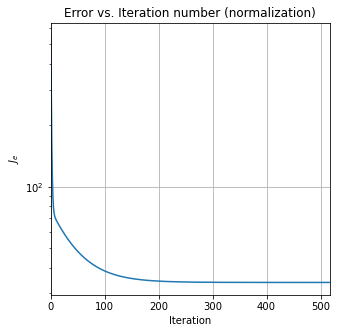

In [26]:
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number (normalization)')
plt.grid()
plt.savefig('error_vs_iteration_normalized.png', dpi=600)
plt.show()

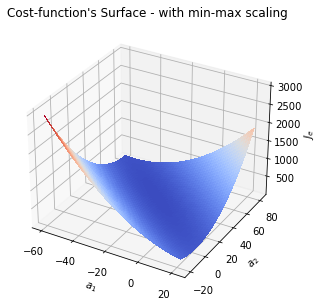

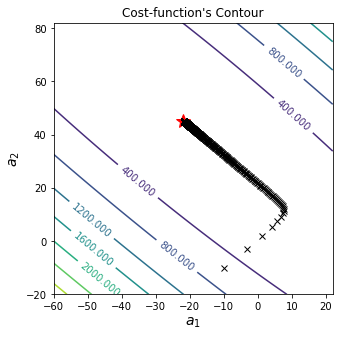

In [27]:
# Plot cost-function surface.
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.set_zlabel('$J_e$')
plt.title('Cost-function\'s Surface - with min-max scaling')
plt.savefig('surface_normalized.png', dpi=600)
#Show the plot.
plt.show()

fig = plt.figure(figsize=(5, 5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.plot(a_opt_norm[0], a_opt_norm[1], c='r', marker='*', markersize=14)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.savefig('contorn_normalized.png', dpi=600)
#Show the plot.
plt.show()

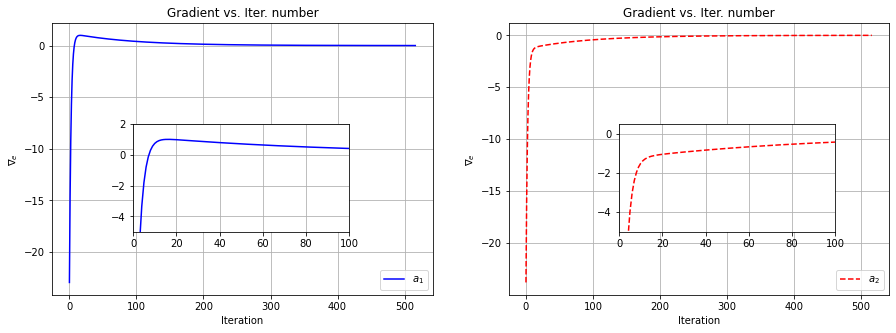

In [28]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.plot(np.arange(0, iteration), grad_hist[0,0:iteration], 'b', label='$a_1$')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('$\\nabla_e$')
ax1.set_title('Gradient vs. Iter. number')
ax1.grid()
ax1.legend()

left, bottom, width, height = [0.2, 0.3, 0.2, 0.3]
ax4 = fig.add_axes([left, bottom, width, height])
ax4.plot(np.arange(0, iteration), grad_hist[0,0:iteration], 'b')
ax4.set_xlim(0, 100)
ax4.set_ylim(-5, 2)
ax4.grid()

ax2 = fig.add_subplot(122)
ax2.plot(np.arange(0, iteration), grad_hist[1,0:iteration], 'r--', label='$a_2$')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('$\\nabla_e$')
ax2.set_title('Gradient vs. Iter. number')
ax2.grid()
ax2.legend()

left, bottom, width, height = [0.65, 0.3, 0.2, 0.3]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.plot(np.arange(0, iteration), grad_hist[1,0:iteration], 'r--')
ax3.set_xlim(0, 100)
ax3.set_ylim(-5, 0.5)
ax3.grid()

plt.savefig('gradiente_normalized.png', dpi=600)

plt.show()